In [10]:
import numpy as np 
import gym 
import time 
import math 
import inspect
from pprint import pprint
from os.path import dirname
from CybORG import CybORG
from CybORG.Agents.Wrappers import *
from CybORG.Simulator.Scenarios import FileReaderScenarioGenerator
from CybORG.Agents.Wrappers.OpenAIGymWrapper import OpenAIGymWrapper
from CybORG.Agents.Wrappers.FixedFlatWrapper import FixedFlatWrapper
from CybORG.Agents import B_lineAgent
from gym import Space
import torch.optim as optim
import torch
import torch as T
import collections
from collections import namedtuple
import matplotlib.pyplot as plt
from CybORG.Agents.CustomCode.A2C import A2C
from  CybORG.Agents.CustomCode.DeepQNetwork import DQN_Agent


In [11]:
env = gym.make('CartPole-v1')
action_space = env.action_space
input_dims = env.observation_space.shape[0]
output_dims = env.action_space.n
agent = DQN_Agent(env, input_dims,output_dims,action_space, lr=5e-4)

num_episodes_test = 20
MAX_EPS = 400
reward_list_dqn = []
torch.manual_seed(44)

# Training loop
for episode in range(MAX_EPS):
    # Train the Q-network using Deep Q-learning.
    state = env.reset()
    state = T.tensor(state, dtype=T.float32).unsqueeze(0)
    done = False
    MAX_STEPS_PER_GAME = 100
    i=0
    ep_reward = 0
    Transition = namedtuple('Transition', ('state', 'action', 'next_state', 'reward'))

    # Loop until reaching the termination state
    while (not done):
        if (i > MAX_STEPS_PER_GAME):
            break
        action = agent.get_action(state)
        state_, rew, done, _  = env.step(action.item())
        ep_reward += rew
        rew = T.tensor([rew])

        if done:
            state_ = None
        else:
            state_ = T.tensor(state_, dtype=torch.float32).unsqueeze(0)

        # Store the new experience
        transition = Transition(state, action, state_, rew)
        agent.store_transition(transition)

        agent.train()

        # Move to the next state
        state = state_

    # Evaluate the agent every 20 episodes during training
    if episode % 20 == 0:
        print("Episode: {}".format(episode))

        # Evaluate the agent's performance over 20 test episodes
        G = np.zeros(num_episodes_test)
        for k in range(num_episodes_test):
            g = agent.test()
            G[k] = g

        reward_mean = G.mean()
        reward_sd = G.std()
        print(f"The test reward for episode {episode} is {reward_mean} with a standard deviation of {reward_sd}.")
        reward_list_dqn.append(reward_mean)

Episode: 0
The test reward for episode 0 is 9.25 with a standard deviation of 0.8874119674649424.
Episode: 20
The test reward for episode 20 is 9.35 with a standard deviation of 0.8529361054615991.
Episode: 40
The test reward for episode 40 is 13.4 with a standard deviation of 1.562049935181331.
Episode: 60
The test reward for episode 60 is 45.7 with a standard deviation of 6.775691846593969.
Episode: 80
The test reward for episode 80 is 98.05 with a standard deviation of 7.996718076811262.
Episode: 100
The test reward for episode 100 is 187.35 with a standard deviation of 34.76388211923404.
Episode: 120
The test reward for episode 120 is 174.25 with a standard deviation of 86.00399700013948.
Episode: 140
The test reward for episode 140 is 135.7 with a standard deviation of 7.842831121476479.
Episode: 160
The test reward for episode 160 is 329.25 with a standard deviation of 11.527684069230904.
Episode: 180
The test reward for episode 180 is 498.75 with a standard deviation of 4.613837

Text(0.5, 1.0, 'Test rewards for DeepQNetwork agent')

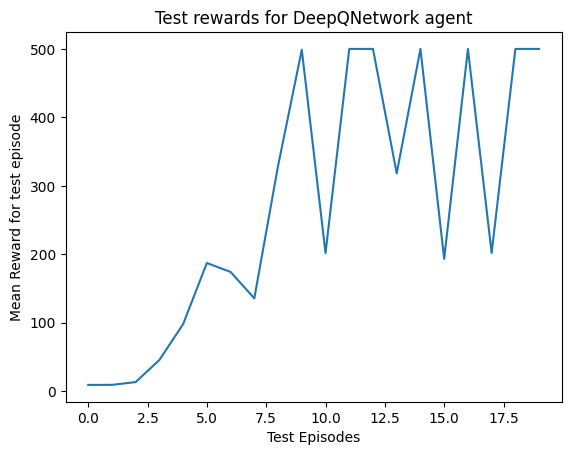

In [12]:
plt.plot(reward_list_dqn)
plt.xlabel("Test Episodes")
plt.ylabel("Mean Reward for test episode")
plt.title("Test rewards for DeepQNetwork agent")

In [13]:
env = gym.make('CartPole-v1')
input_dims = env.observation_space.shape[0]
output_dims = env.action_space.n
agent = A2C(env, input_dims, output_dims)

reward_list_a2c = []
MAX_EPISODE = 400
MAX_STEPS_PER_EPISODE = 100
num_episodes_test = 20
torch.manual_seed(44)

for episode in range(MAX_EPISODE):
    state = env.reset()
    state = T.tensor(state)
    done = False
    ep_reward = 0
    i = 0
    while not done:
        if i > MAX_STEPS_PER_EPISODE:
            break
        # env.render()
        action,log_prob = agent.get_action(state)
        state_,rew,done,_  = env.step(action)
        ep_reward += rew
        state_ = T.tensor(state_)
        agent.train(log_prob,state,state_,rew,done)
        state = state_

    # Evaluate the agent every 20 episodes during training
    if episode % 20 == 0:
        print("Episode: {}".format(episode))

        # Evaluate the agent's performance over 20 test episodes
        G = np.zeros(num_episodes_test)
        for k in range(num_episodes_test):
            g = agent.test()
            G[k] = g

        reward_mean = G.mean()
        reward_sd = G.std()
        print(f"The test reward for episode {episode} is {reward_mean} with a standard deviation of {reward_sd}.")
        reward_list_a2c.append(reward_mean)

Episode: 0
The test reward for episode 0 is 21.7 with a standard deviation of 9.597395480024776.
Episode: 20
The test reward for episode 20 is 24.2 with a standard deviation of 15.11158495989087.
Episode: 40
The test reward for episode 40 is 21.0 with a standard deviation of 9.648834126463155.
Episode: 60
The test reward for episode 60 is 47.6 with a standard deviation of 26.380674744971934.
Episode: 80
The test reward for episode 80 is 28.8 with a standard deviation of 7.131619731870173.
Episode: 100
The test reward for episode 100 is 43.35 with a standard deviation of 15.544371971874579.
Episode: 120
The test reward for episode 120 is 48.35 with a standard deviation of 16.10675324204105.
Episode: 140
The test reward for episode 140 is 68.8 with a standard deviation of 23.6.
Episode: 160
The test reward for episode 160 is 46.85 with a standard deviation of 12.669944751260758.
Episode: 180
The test reward for episode 180 is 64.6 with a standard deviation of 31.456954715928877.
Episode:

Text(0.5, 1.0, 'Test rewards for A2C agent')

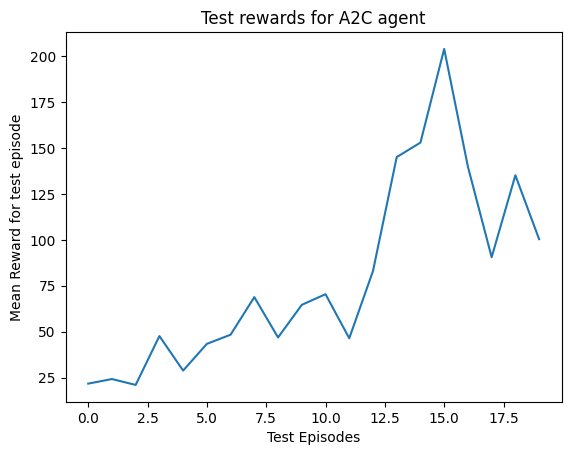

In [14]:
plt.plot(reward_list_a2c)
plt.xlabel("Test Episodes")
plt.ylabel("Mean Reward for test episode")
plt.title("Test rewards for A2C agent")

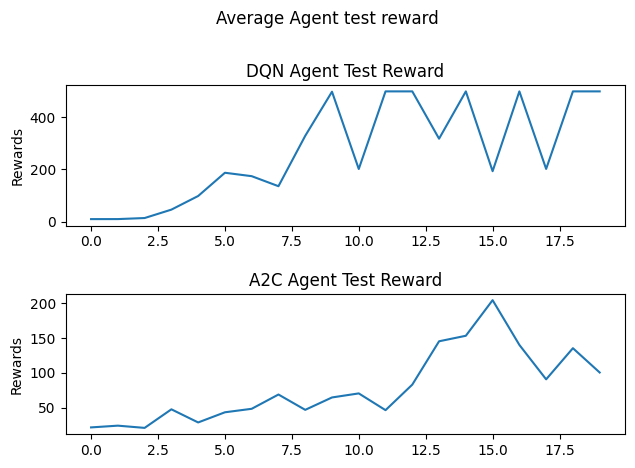

In [15]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2,1)
fig.suptitle('Average Agent test reward')
l1 = axs[0].plot([i for i in range(len(reward_list_dqn))],reward_list_dqn, label="DQN")
axs[0].set_title('DQN Agent Test Reward')
l3 = axs[1].plot([i for i in range(len(reward_list_a2c))],reward_list_a2c, label="A2C")
axs[1].set_title('A2C Agent Test Reward')
fig.tight_layout(pad=1.6)

for ax in axs.flat:
    ax.set(ylabel='Rewards')